## Living Costs Food Survey: Data Wrangling and Integrating

This script contains the following:
#### 01. Import Libraries and Assign Path
#### 02. Importing and Checking lcf_clean.pkl
#### 03. Combining columns to get total number of adults and children
#### 04. Creating food groups - unprocessed, processed, ordinarily processed and ultra-processed
* Unprocessed or minimally processed foods
* Processed culinary ingredients and processed foods
* Ultra-processed foods

##### Save food data set for Tableau Analysis
#### 05. Adding Number of households
#### 06. Removing All Columns No Longer Required
#### 07. Adding Weighted Columns
#### 08. Joining the df_lcf_wrangled and df_lcf_weighted Dataframes
#### 09. Adding Percentage Columns for Processed and Unprocessed Food
#### 10. Joining the df_lcf_weighted and df_lcf_per Dataframes
#### 11. Descriptive Statistics on Integrated Data Set
#### 12. Problems Identified and Further Cleaning
* No. of households
* Food Groups

#### 13. Removing Outliers, Dirty Data and Calculated Columns no Longer Required
#### 14. Exporting the Integrated Data Set
---

## 01. Import Libraries and Assign Path

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign the main project folder path to the variable path
path = r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

In [3]:
path

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

---

## 02. Importing and Checking lcf_clean.pkl

In [4]:
# Use the os.path.join() function to import the lcf_clean.pkl file as pandas a dataframe and view first five rows
df_lcf_clean = pd.read_csv(os.path.join(path, '02_Data', '02_2_Prepared_Data', 'lcf_clean.csv'), index_col = False)
df_lcf_clean.head()

,Unnamed: 0,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
0,0,1,0,0,0,0,1,0,0,0,...,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016
1,1,2,0,0,1,3,1,0,0,0,...,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015
2,2,3,0,0,0,0,2,0,0,0,...,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016
3,3,4,1,0,1,1,0,0,0,0,...,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015
4,4,5,0,0,1,2,0,0,0,0,...,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015


In [5]:
# check bottom five rows of the dataframe df_lcf
df_lcf_clean.tail()

,Unnamed: 0,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
26146,26266,26267,0,0,0,0,0,0,0,2,...,98.940,0.0,98.940,430.703816,0.0,430.703816,Urban,NaN,20.564904,2019
26147,26267,26268,0,0,0,0,0,0,1,0,...,61.105,0.0,61.105,326.996012,0.0,326.996012,Urban,NaN,21.733643,2019
26148,26268,26269,0,0,0,0,0,2,0,0,...,82.290,0.0,82.290,574.437456,0.0,574.437456,Urban,NaN,23.384263,2019
26149,26269,26270,0,0,0,1,0,0,0,0,...,16.250,0.0,16.250,1535.124346,0.0,1535.124346,Urban,NaN,38.794210,2019
26150,26270,26271,0,0,0,0,2,0,0,0,...,77.680,0.0,77.680,401.611044,0.0,401.611044,Urban,NaN,25.608355,2020


In [6]:
# Drop the Unamed: 0 column
df_lcf_clean = df_lcf_clean.drop(columns = ['Unnamed: 0'])
df_lcf_clean.head() 

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year
0,1,0,0,0,0,1,0,0,0,1,...,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016
1,2,0,0,1,3,1,0,0,0,5,...,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015
2,3,0,0,0,0,2,0,0,0,2,...,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016
3,4,1,0,1,1,0,0,0,0,3,...,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015
4,5,0,0,1,2,0,0,0,0,3,...,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015


In [7]:
# dataframe information
df_lcf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26151 entries, 0 to 26150
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_id                 26151 non-null  int64  
 1   children_0-2              26151 non-null  int64  
 2   children_2-5              26151 non-null  int64  
 3   children_5-18             26151 non-null  int64  
 4   adults_18-45              26151 non-null  int64  
 5   adults_45-60              26151 non-null  int64  
 6   adults_60-65              26151 non-null  int64  
 7   adults_65-70              26151 non-null  int64  
 8   adults_70+                26151 non-null  int64  
 9   no_people                 26151 non-null  int64  
 10  household_type            26151 non-null  object 
 11  quarter                   26151 non-null  object 
 12  rice                      26151 non-null  float64
 13  bread                     26151 non-null  float64
 14  buns_b

In [8]:
# Check the dataframe shape
df_lcf_clean.shape

(26151, 90)

---

## 03. Combining columns to get total number of adults and children

In [9]:
# Combine all the number of children columns to create column no_children with total number of children
children_list = ['children_0-2', 'children_2-5', 'children_5-18']
df_lcf_clean['no_children'] = df_lcf_clean[children_list].sum(axis=1)
df_lcf_clean['no_children']

0        0
1        1
2        0
3        2
4        1
        ..
26146    0
26147    0
26148    0
26149    0
26150    0
Name: no_children, Length: 26151, dtype: int64

In [10]:
# check the values
df_lcf_clean['no_children'].unique()

array([0, 1, 2, 3, 5, 4, 6, 7])

In [11]:
# Combine all the number of adult columns to create column adult_total with total number of adults
adult_list = ['adults_18-45', 'adults_45-60', 'adults_60-65', 'adults_65-70', 'adults_70+']
df_lcf_clean['no_adult'] =  df_lcf_clean[adult_list].sum(axis=1)
df_lcf_clean['no_adult']

0        1
1        4
2        2
3        1
4        2
        ..
26146    2
26147    1
26148    2
26149    1
26150    2
Name: no_adult, Length: 26151, dtype: int64

In [12]:
# check the values
df_lcf_clean['no_adult'].unique()

array([1, 4, 2, 3, 5, 6, 7, 8, 0])

**Removing outlier - can't have no adults in the household**

In [13]:
# Search for unique_id of data identified above and view the first five rows
df_remove =  df_lcf_clean[df_lcf_clean['no_adult'].isin([0])]
df_remove.head()

,unique_id,children_0-2,children_2-5,children_5-18,adults_18-45,adults_45-60,adults_60-65,adults_65-70,adults_70+,no_people,...,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult
15923,15988,0,0,1,0,0,0,0,0,1,...,27.520,213.164016,0.0,213.164016,Rural,NaN,18.292485,2019,1,0
16879,16948,1,0,1,0,0,0,0,0,2,...,28.465,91.305000,0.0,91.305000,NaN,Rural,16.230491,2018,2,0
17746,17822,0,0,1,0,0,0,0,0,1,...,11.275,71.735000,0.0,71.735000,Urban,NaN,82.658782,2019,1,0


In [14]:
# Remove the data identified above and view the shape of the dataframe
remove_list = [15988, 16948, 17822]
df_lcf_clean = df_lcf_clean[~df_lcf_clean.unique_id.isin(remove_list)]
df_lcf_clean.shape

(26148, 92)

In [15]:
# check the values
df_lcf_clean['no_adult'].unique()

array([1, 4, 2, 3, 5, 6, 7, 8])

---

## 04. Creating food groups - unprocessed, processed and ultra-processed

Foods have been categorised into three groups.

In [16]:
# View the dataframe shape
df_lcf_clean.columns

Index(['unique_id', 'children_0-2', 'children_2-5', 'children_5-18',
       'adults_18-45', 'adults_45-60', 'adults_60-65', 'adults_65-70',
       'adults_70+', 'no_people', 'household_type', 'quarter', 'rice', 'bread',
       'buns_biscuits', 'pasta', 'cakes_puddings', 'pastry',
       'other_bread_cereal', 'beef', 'pork', 'lamb', 'poultry', 'sausages',
       'bacon_ham', 'offal_pate', 'processed_meat', 'meat', 'fish', 'seafood',
       'preserved_seafood', 'processed_fish', 'whole_milk', 'low_milk',
       'preserved_milk', 'yoghurt', 'cheese', 'other_milk', 'eggs', 'butter',
       'margarine', 'peanut_butter', 'olive_oil', 'oils', 'animal_fats',
       'citrus_fruit', 'bananas', 'apples', 'pears', 'stone_fruits', 'berries',
       'fruits', 'dried_fruit_nuts', 'preserved_fruit', 'fresh_veg', 'cabbage',
       'veg', 'root_veg', 'dried_veg', 'preserved_veg', 'potatoes',
       'tuber_veg', 'sugar', 'jam', 'chocolate', 'confectionary', 'ice_cream',
       'sugar_prod', 'sauces', 'co

### Unprocessed or minimally processed foods
* fresh, dry or frozen fruits and vegetables;
* packaged grains and pulses; 
* grits, flakes or flours made from corn, wheat, rye; 
* pasta, fresh or dry, made from flours and water; 
* eggs; 
* fresh or frozen meat and fish; 
* fresh or pasteurized milk.<br>

*['rice',  'pasta', 'beef', 'pork', 'lamb', 'poultry', 'meat', 'fish', 'seafood',
'whole_milk', 'low_milk', 'eggs', 'citrus_fruit', 'bananas', 'apples', 'pears', 
'stone_fruits', 'berries', 'fruits', 'fresh_veg', 'cabbage', 'veg', 'root_veg', 
'potatoes', 'tuber_veg']*  

In [17]:
# Combine all the unprocessed food group columns to create unprocessed_food
unprocessed_list = ['rice', 'pasta', 'beef', 'pork', 'lamb', 'poultry', 'meat', 'fish', 'seafood', 'whole_milk', 'low_milk','eggs', 'citrus_fruit', 'bananas', 'apples', 'pears', 'stone_fruits', 'berries', 'fruits', 'fresh_veg', 'cabbage', 'veg', 'root_veg', 'potatoes', 'tuber_veg']
df_lcf_clean['unprocessed_food'] = df_lcf_clean[unprocessed_list].sum(axis=1)
df_lcf_clean['unprocessed_food']

0        14.600
1        10.735
2        35.370
3        14.155
4        12.380
          ...  
26146    21.185
26147    15.730
26148    24.225
26149     0.000
26150    27.450
Name: unprocessed_food, Length: 26148, dtype: float64

### Processed culinary ingredients and processed foods
* sugar, 
* oils, 
* fats, 
* preserved vegetables, 
* preserved fruits, 
* preserved meat and fish, 
* cheese, 
* bread and other similar ready-to-consume products. 
<br>

Manufactured with the addition of unprocessed or minimally processed foods of salt, sugar, oil or other substances of culinary use.<br>
*['sugar', 'olive_oil', 'oils', 'animal_fats', 'preserved_seafood', 'preserved_milk', 'cheese',  'butter', 'dried_fruit_nuts',   'preserved_fruit', 'dried_veg', 'preserved_veg']*

In [18]:
# Combine all the processed food group columns to create processed_food
processed_list = ['sugar', 'olive_oil', 'oils', 'animal_fats', 'preserved_seafood', 'preserved_milk', 'cheese', 'butter', 'dried_fruit_nuts', 'preserved_fruit', 'dried_veg', 'preserved_veg']
df_lcf_clean['processed_food'] =df_lcf_clean[processed_list].sum(axis=1)
df_lcf_clean['processed_food']

0         0.275
1         1.300
2         6.290
3         3.880
4         4.110
          ...  
26146    10.640
26147     4.000
26148     4.650
26149     0.000
26150     7.895
Name: processed_food, Length: 26148, dtype: float64

### Ultra-processed foods
* sweet, 
* fatty or salty packaged snack products; 
* ice cream, 
* chocolate, 
* candies; 
* mass-produced packaged breads, 
* cookies, 
* pastries, 
* cakes; 
* breakfast cereals; 
* preserves; 
* margarines; 
* milk drinks, including ‘fruit’ yoghurts; cocoa drinks; 
* reconstituted meat product. 
<br>

Industrial formulations manufactured mostly or entirely from sugar, salt, oils and fats, starches and many substances derived from foods but not normally used in kitchens, and additives including those used to imitate the sensory qualities of natural foods or to disguise undesirable qualities of the final product. <br>
*['bread', 'buns_biscuits', 'cakes_puddings', 'pastry', 'other_bread_cereal', 'sausages', 'bacon_ham', 'offal_pate', 'processed_meat',  'processed_fish', 'yoghurt', 'other_milk', 'margarine', 'peanut_butter',  'jam', 'chocolate', 'confectionary', 'ice_cream', 'sugar_prod', 'sauces', 'condiments', 'misc', 'other_food']*

In [19]:
# Combine all the ultra-processed food group columns to create ultra_processed_food
ultra_processed_list = ['bread', 'buns_biscuits',  'cakes_puddings', 'pastry', 'other_bread_cereal',  'sausages', 'bacon_ham', 'offal_pate', 'processed_meat', 'processed_fish', 'yoghurt', 'other_milk', 'margarine', 'peanut_butter', 'jam', 'chocolate', 'confectionary', 'ice_cream', 'sugar_prod', 'sauces', 'condiments', 'misc', 'other_food']
df_lcf_clean['ultra_processed_food'] = df_lcf_clean[ultra_processed_list].sum(axis=1)
df_lcf_clean['ultra_processed_food']

0        21.715
1        26.210
2        35.475
3        11.975
4        54.445
          ...  
26146    54.740
26147    12.675
26148     8.170
26149     0.000
26150    29.735
Name: ultra_processed_food, Length: 26148, dtype: float64

### Save food type data set for Tableau Analysis

In [20]:
# Convert quarter column entries to Q1 to Q4 with .replace() and recheck column
lcf_food = df_lcf_clean[['year', 'quarter', 'rice', 'bread',
       'buns_biscuits', 'pasta', 'cakes_puddings', 'pastry',
       'other_bread_cereal', 'beef', 'pork', 'lamb', 'poultry', 'sausages',
       'bacon_ham', 'offal_pate', 'processed_meat', 'meat', 'fish', 'seafood',
       'preserved_seafood', 'processed_fish', 'whole_milk', 'low_milk',
       'preserved_milk', 'yoghurt', 'cheese', 'other_milk', 'eggs', 'butter',
       'margarine', 'peanut_butter', 'olive_oil', 'oils', 'animal_fats',
       'citrus_fruit', 'bananas', 'apples', 'pears', 'stone_fruits', 'berries',
       'fruits', 'dried_fruit_nuts', 'preserved_fruit', 'fresh_veg', 'cabbage',
       'veg', 'root_veg', 'dried_veg', 'preserved_veg', 'potatoes',
       'tuber_veg', 'sugar', 'jam', 'chocolate', 'confectionary', 'ice_cream',
       'sugar_prod', 'sauces', 'condiments', 'misc', 'other_food']]
lcf_food['quarter'] = df_lcf_clean['quarter'].replace({'January to March': '1', 'April to June': '2', 'July to September': '3', 'October to December': '4'})
lcf_food['quarter'].value_counts(dropna = False)

<ipython-input-20-5ce1014a266d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcf_food['quarter'] = df_lcf_clean['quarter'].replace({'January to March': '1', 'April to June': '2', 'July to September': '3', 'October to December': '4'})


4    6737
3    6506
1    6485
2    6420
Name: quarter, dtype: int64

In [21]:
# check for missing values
lcf_food['quarter'].isnull().sum()

0

In [22]:
lcf_food['date'] = lcf_food.apply(lambda x: pd.Period(f"{x['quarter']}Q{x['year']}" ).end_time.strftime('%Y-%m-%d'), axis=1)
lcf_food['date'].head()

<ipython-input-22-cafb2af29ce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcf_food['date'] = lcf_food.apply(lambda x: pd.Period(f"{x['quarter']}Q{x['year']}" ).end_time.strftime('%Y-%m-%d'), axis=1)


0    2016-03-31
1    2015-09-30
2    2016-03-31
3    2015-09-30
4    2015-06-30
Name: date, dtype: object

In [23]:
lcf_food.T

,0,1,2,3,4,5,6,7,8,9,...,26141,26142,26143,26144,26145,26146,26147,26148,26149,26150
year,2016,2015,2016,2015,2015,2015,2015,2015,2015,2015,...,2020,2019,2020,2019,2020,2019,2019,2019,2019,2020
quarter,1,3,1,3,2,3,3,4,2,2,...,1,4,1,4,1,4,2,3,4,1
rice,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.275,0.0,0.0,0.0,0.0,0.0,0.0,1.77
bread,3.165,0.62,1.395,0.725,6.305,3.74,0.0,0.15,4.565,1.415,...,0.375,0.0,4.985,0.395,2.5,4.315,1.35,0.79,0.0,2.56
buns_biscuits,0.0,0.35,1.5,1.22,3.615,1.5,0.0,0.0,0.0,1.93,...,0.0,0.0,2.79,0.995,1.49,4.8,2.185,0.5,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sauces,0.0,1.0,3.43,1.23,0.0,1.125,0.0,0.0,3.675,1.78,...,1.68,0.895,4.765,0.85,2.175,1.6,0.695,0.825,0.0,0.705
condiments,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.045,0.0,0.495,0.0,0.0,0.0,0.0,0.0,0.0,0.42
misc,1.635,0.0,1.205,0.525,0.0,0.0,0.0,0.0,0.75,1.445,...,0.0,0.0,1.6,1.25,1.25,0.5,1.55,0.0,0.0,2.97
other_food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
lcf_food = lcf_food.groupby(['year']).mean()
lcf_food.head()

,rice,bread,buns_biscuits,pasta,cakes_puddings,pastry,other_bread_cereal,beef,pork,lamb,...,sugar,jam,chocolate,confectionary,ice_cream,sugar_prod,sauces,condiments,misc,other_food
year,,,,,,,,,,,,,,,,,,,,,
2015,0.415809,2.484706,2.258880,0.394161,1.493152,0.853935,2.336879,1.989323,0.643268,0.649940,...,0.209061,0.300274,1.837805,0.804258,0.668258,0.154890,1.229135,0.192321,1.009585,0.053025
2016,0.388381,2.436034,2.249342,0.420792,1.494709,0.826035,2.313116,2.027367,0.580121,0.600795,...,0.212199,0.309490,2.020926,0.784615,0.610565,0.159718,1.234157,0.211950,1.033362,0.078966
2017,0.417873,2.593961,2.351282,0.422929,1.619299,0.911075,2.406841,2.099899,0.611325,0.588209,...,0.206868,0.325274,2.103628,0.801273,0.678680,0.178050,1.224112,0.223188,1.092864,0.049195
2018,0.435027,2.600263,2.359777,0.433111,1.597652,0.936020,2.445173,2.083111,0.583194,0.525508,...,0.201882,0.299589,2.244684,0.807383,0.739875,0.166977,1.243536,0.247792,1.077591,0.086283
2019,0.483681,2.634470,2.464455,0.432167,1.633639,0.937610,2.506732,1.878291,0.512826,0.578034,...,0.198808,0.319863,2.266415,0.833952,0.750208,0.168979,1.251501,0.245978,1.054229,0.065074


In [25]:
df_lcf_food = lcf_food.T
df_lcf_food.head()

year,2015,2016,2017,2018,2019,2020
rice,0.415809,0.388381,0.417873,0.435027,0.483681,0.575004
bread,2.484706,2.436034,2.593961,2.600263,2.634470,2.851798
buns_biscuits,2.258880,2.249342,2.351282,2.359777,2.464455,2.535289
pasta,0.394161,0.420792,0.422929,0.433111,0.432167,0.551920
cakes_puddings,1.493152,1.494709,1.619299,1.597652,1.633639,1.448177


In [26]:
df_lcf_food.nunique()

year
2015    60
2016    60
2017    60
2018    60
2019    60
2020    60
dtype: int64

In [27]:
df_lcf_food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, rice to other_food
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2015    60 non-null     float64
 1   2016    60 non-null     float64
 2   2017    60 non-null     float64
 3   2018    60 non-null     float64
 4   2019    60 non-null     float64
 5   2020    60 non-null     float64
dtypes: float64(6)
memory usage: 5.3+ KB


In [28]:
df_lcf_food.isnull().sum()

year
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

In [29]:
# Export the dataframe into the Prepared_Data folder as lcf_food.csv 
df_lcf_food.to_csv(os.path.join(path, '02_Data','02_2_Prepared_Data', 'lcf_food.csv'))

In [30]:
# Checking unprocessed, processed and ultra-processed food costs add up
df_lcf_clean['food'] = df_lcf_clean['ultra_processed_food'] + df_lcf_clean['processed_food'] + df_lcf_clean['unprocessed_food']
df_lcf_clean['drinks_eatout'] = df_lcf_clean['total_food_cost'] - (df_lcf_clean['food'])

df_lcf_clean[[ 'food', 'drinks_eatout', 'total_food_cost']].head(30)

,food,drinks_eatout,total_food_cost
0,36.590,2.085,38.675
1,38.245,23.225,61.470
2,77.135,50.300,127.435
3,30.010,19.490,49.500
4,70.935,93.535,164.470
5,48.185,151.550,199.735
6,9.425,11.060,20.485
7,28.280,15.375,43.655
8,54.465,21.520,75.985
9,39.840,147.965,187.805


In [31]:
# View the dataframe shape
df_lcf_clean.shape

(26148, 97)

---

## 05. Adding Number of households

The number of households represented is equal to 1,000 x quarterly_weight. When weighted every household in the UK is represented each quarter. 

In [32]:
# Create household column
df_lcf_clean['no_households'] = df_lcf_clean['quarterly_weight'] * 1000
df_lcf_clean['no_households']

0        25550.684137
1        30114.910401
2        21164.147467
3        15847.542724
4        15858.930011
             ...     
26146    20564.904212
26147    21733.643012
26148    23384.263145
26149    38794.209979
26150    25608.355026
Name: no_households, Length: 26148, dtype: float64

Check the approx. number of households each year are similar to the UK values recorded elsewhere<br>
* 2020 - 27.8 million 
* 2019 - 27.8 million  
* 2018 - 27.6 million 
* 2017 - 27.2 million 
* 2016 - 27.1 million
* 2015 - 27.0 million

In [33]:
(df_lcf_clean.groupby('year')['no_households'].sum())/4

year
2015    2.030317e+07
2016    2.712027e+07
2017    2.687706e+07
2018    2.732926e+07
2019    2.763123e+07
2020    6.848089e+06
Name: no_households, dtype: float64

2015 and 202 are not full years

In [34]:
# Change data type to int32
df_lcf_clean['no_households'] = df_lcf_clean['no_households'].astype('int32')
df_lcf_clean['no_households']

0        25550
1        30114
2        21164
3        15847
4        15858
         ...  
26146    20564
26147    21733
26148    23384
26149    38794
26150    25608
Name: no_households, Length: 26148, dtype: int32

In [35]:
# View the dataframe shape
df_lcf_clean.shape

(26148, 98)

---

## 06. Removing All Columns No Longer Required

Remove children and adult age group columns which are no longer required

In [36]:
# Remove all columns between column name 'rice' to 'other_food' (8 columns) and display all columns
df_lcf_wrangled = df_lcf_clean.drop(df_lcf_clean.loc[:, 'children_0-2':'adults_70+'].columns, axis=1)
pd.set_option('display.max_columns', None)
df_lcf_wrangled.head()

,unique_id,no_people,household_type,quarter,rice,bread,buns_biscuits,pasta,cakes_puddings,pastry,other_bread_cereal,beef,pork,lamb,poultry,sausages,bacon_ham,offal_pate,processed_meat,meat,fish,seafood,preserved_seafood,processed_fish,whole_milk,low_milk,preserved_milk,yoghurt,cheese,other_milk,eggs,butter,margarine,peanut_butter,olive_oil,oils,animal_fats,citrus_fruit,bananas,apples,pears,stone_fruits,berries,fruits,dried_fruit_nuts,preserved_fruit,fresh_veg,cabbage,veg,root_veg,dried_veg,preserved_veg,potatoes,tuber_veg,sugar,jam,chocolate,confectionary,ice_cream,sugar_prod,sauces,condiments,misc,other_food,case_no,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households
0,1,1,Index,January to March,0.0,3.165,0.000,0.455,0.000,0.0,1.545,0.00,0.0,0.0,2.935,3.68,2.00,0.0,3.180,0.0,0.0,0.0,0.0,2.115,0.0,2.220,0.0,0.880,0.0,0.00,0.000,0.00,0.85,0.0,0.0,0.000,0.0,0.000,0.000,2.000,2.000,0.0,0.000,0.0,0.000,0.275,0.000,0.50,0.99,0.000,0.0,0.000,1.000,2.500,0.000,0.665,2.00,0.00,0.0,0.0,0.00,0.0,1.635,0.0,1,173.270000,Eastern,179.684359,1.0,173.27,173.27,Self-employment inc.,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016,0,1,14.600,0.275,21.715,36.590,2.085,25550
1,2,5,Index,July to September,1.0,0.620,0.350,0.000,0.900,0.0,2.250,0.00,0.0,0.0,4.750,0.00,1.04,0.0,8.800,0.0,2.0,0.0,0.0,0.000,0.0,0.000,0.0,4.250,1.3,0.50,0.600,0.00,0.00,0.0,0.0,0.000,0.0,0.000,0.385,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.00,0.00,0.000,0.0,0.000,2.000,0.000,0.000,0.000,6.00,0.50,0.0,0.0,1.00,0.0,0.000,0.0,4,333.667857,North West and Merseyside,1117.340000,2.8,1117.34,934.27,Wages salaries,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015,1,4,10.735,1.300,26.210,38.245,23.225,30114
2,3,2,Index,January to March,0.0,1.395,1.500,0.400,0.000,0.0,5.250,5.98,0.0,0.0,0.000,1.25,4.00,0.5,6.475,0.0,0.0,0.0,0.0,0.000,0.0,0.975,0.0,4.970,2.4,0.50,1.375,0.00,1.00,0.0,0.0,0.000,0.0,3.180,1.065,3.165,2.035,0.0,4.085,0.0,0.000,0.000,0.695,2.25,2.30,2.835,0.0,3.465,1.735,3.295,0.425,0.000,3.00,1.00,0.0,0.0,3.43,0.0,1.205,0.0,7,678.860000,North West and Merseyside,1269.120000,1.5,732.74,1018.29,Wages salaries,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016,0,2,35.370,6.290,35.475,77.135,50.300,21164
3,4,3,Index,July to September,0.0,0.725,1.220,1.860,1.645,0.0,0.685,0.00,0.0,0.0,0.000,0.00,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,1.0,0.000,0.0,3.695,2.1,0.75,0.800,0.00,0.75,0.0,0.0,0.315,0.0,1.445,0.340,0.750,0.000,0.0,1.500,0.0,0.365,0.000,0.000,0.00,1.89,2.200,0.0,1.100,0.845,1.525,0.000,0.000,0.00,0.75,0.0,0.0,1.23,0.0,0.525,0.0,8,180.000000,South East,391.475289,1.6,288.00,288.00,Social sec. benefits,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015,2,1,14.155,3.880,11.975,30.010,19.490,15847
4,5,3,Index,April to June,0.0,6.305,3.615,0.000,2.355,3.7,4.040,0.00,0.0,0.0,4.240,2.00,0.00,0.0,9.120,0.0,0.0,0.0,0.0,0.600,0.0,0.450,0.0,0.000,0.0,1.50,1.000,0.74,0.00,0.0,0.0,0.000,0.0,0.000,0.000,0.650,0.000,0.0,0.495,0.0,1.800,0.000,0.620,0.00,1.22,0.665,0.0,1.570,0.870,2.170,0.000,0.000,20.71,0.50,0.0,0.0,0.00,0.0,0.000,0.0,9,375.455000,North West and Merseyside,922.302564,2.0,911.70,750.91,Wages salaries,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015,1,2,12.380,4.110,54.445,70.935,93.535,15858


In [37]:
# Check the dataframe shape
df_lcf_wrangled.shape

(26148, 90)

Remove all individual food item columns which are no longer required.

In [38]:
# Remove all columns between column name 'rice' to 'other_food' (60 columns) and display all columns
df_lcf_wrangled = df_lcf_wrangled.drop(df_lcf_wrangled.loc[:, 'rice':'other_food'].columns, axis=1)
pd.set_option('display.max_columns', None)
df_lcf_wrangled.head()

,unique_id,no_people,household_type,quarter,case_no,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households
0,1,1,Index,January to March,1,173.270000,Eastern,179.684359,1.0,173.27,173.27,Self-employment inc.,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016,0,1,14.600,0.275,21.715,36.590,2.085,25550
1,2,5,Index,July to September,4,333.667857,North West and Merseyside,1117.340000,2.8,1117.34,934.27,Wages salaries,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015,1,4,10.735,1.300,26.210,38.245,23.225,30114
2,3,2,Index,January to March,7,678.860000,North West and Merseyside,1269.120000,1.5,732.74,1018.29,Wages salaries,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016,0,2,35.370,6.290,35.475,77.135,50.300,21164
3,4,3,Index,July to September,8,180.000000,South East,391.475289,1.6,288.00,288.00,Social sec. benefits,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015,2,1,14.155,3.880,11.975,30.010,19.490,15847
4,5,3,Index,April to June,9,375.455000,North West and Merseyside,922.302564,2.0,911.70,750.91,Wages salaries,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015,1,2,12.380,4.110,54.445,70.935,93.535,15858


In [39]:
# Check the dataframe shape
df_lcf_wrangled.shape

(26148, 30)

Remove case number

In [40]:
# Remove case_no column and display all columns
df_lcf_wrangled.drop(columns = ['case_no'], inplace = True)
pd.set_option('display.max_columns', None)
df_lcf_wrangled.head()

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households
0,1,1,Index,January to March,173.270000,Eastern,179.684359,1.0,173.27,173.27,Self-employment inc.,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016,0,1,14.600,0.275,21.715,36.590,2.085,25550
1,2,5,Index,July to September,333.667857,North West and Merseyside,1117.340000,2.8,1117.34,934.27,Wages salaries,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015,1,4,10.735,1.300,26.210,38.245,23.225,30114
2,3,2,Index,January to March,678.860000,North West and Merseyside,1269.120000,1.5,732.74,1018.29,Wages salaries,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016,0,2,35.370,6.290,35.475,77.135,50.300,21164
3,4,3,Index,July to September,180.000000,South East,391.475289,1.6,288.00,288.00,Social sec. benefits,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015,2,1,14.155,3.880,11.975,30.010,19.490,15847
4,5,3,Index,April to June,375.455000,North West and Merseyside,922.302564,2.0,911.70,750.91,Wages salaries,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015,1,2,12.380,4.110,54.445,70.935,93.535,15858


In [41]:
# check tbottom five rows of the dataframe df_lcf
df_lcf_wrangled.tail()

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households
26146,26267,2,Index,October to December,371.910872,North West and Merseyside,606.796308,1.5,606.796308,557.866308,Annuities pensions,98.940,0.0,98.940,430.703816,0.0,430.703816,Urban,NaN,20.564904,2019,0,2,21.185,10.640,54.740,86.565,12.375,20564
26147,26268,1,Index,April to June,464.068154,West Midlands,548.052769,1.0,540.688154,464.068154,Annuities pensions,61.105,0.0,61.105,326.996012,0.0,326.996012,Urban,NaN,21.733643,2019,0,1,15.730,4.000,12.675,32.405,28.700,21733
26148,26269,2,Index,July to September,208.920000,South East,332.530000,1.5,332.530000,313.380000,Wages salaries,82.290,0.0,82.290,574.437456,0.0,574.437456,Urban,NaN,23.384263,2019,0,2,24.225,4.650,8.170,37.045,45.245,23384
26149,26270,1,Index,October to December,1335.470000,London,1968.035705,1.0,1962.250000,1335.470000,Wages salaries,16.250,0.0,16.250,1535.124346,0.0,1535.124346,Urban,NaN,38.794210,2019,0,1,0.000,0.000,0.000,0.000,16.250,38794
26150,26271,2,Index,January to March,277.226667,East Midlands,495.160000,1.5,495.160000,415.840000,Wages salaries,77.680,0.0,77.680,401.611044,0.0,401.611044,Urban,NaN,25.608355,2020,0,2,27.450,7.895,29.735,65.080,12.600,25608


In [42]:
# Check the dataframe shape
df_lcf_wrangled.shape

(26148, 29)

---

## 07. Adding Weighted Columns

To reflect all housholds across the UK each quarter the income, expenditure, food costs and processed food columns need to be weighted using the quarterly_weight.<br>
[quarterly_weight has data type float and couldn't find a way to do multiple columns]

In [43]:
# Create new dataframe with weighted values
df_lcf_weighted = df_lcf_wrangled[['OECD_disposable_income','total_income', 'gross_income', 'weekly_disposable_income', 'adult_food_cost', 'child_food_cost', 'total_food_cost', 'adult_total_expenditure', 'child_total_expenditure', 'total_expenditure', 'unprocessed_food', 'processed_food', 'ultra_processed_food', 'drinks_eatout', 'food',]].multiply(df_lcf_wrangled['quarterly_weight'], axis = 'index')

In [44]:
df_lcf_weighted.head()

,OECD_disposable_income,total_income,gross_income,weekly_disposable_income,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,unprocessed_food,processed_food,ultra_processed_food,drinks_eatout,food
0,4427.167040,4591.058300,4427.167040,4427.167040,988.172709,0.000000,988.172709,2511.076176,0.000000,2511.076176,373.039988,7.026438,554.833106,53.273176,934.899533
1,10048.377621,33648.593987,33648.593987,28135.457340,1827.071614,24.091928,1851.163542,13186.349938,114.436660,13300.786598,323.283563,39.149384,789.311802,699.418794,1151.744748
2,14367.493149,26859.842833,15507.817415,21551.239724,2697.053132,0.000000,2697.053132,16984.800931,0.000000,16984.800931,748.575896,133.122488,750.798131,1064.556618,1632.496515
3,2852.557690,6203.921362,4564.092304,4564.092304,768.605822,15.847543,784.453365,9200.604165,15.847543,9216.451707,224.321967,61.488466,189.774324,308.868608,475.584757
4,5954.314567,14626.731813,14458.586491,11908.629135,2153.166928,372.288382,2608.318219,9434.408332,610.013743,10127.284984,196.333554,65.180202,863.439444,1483.365019,1124.953200


In [45]:
# Rename columns in weighted dataframe
df_lcf_weighted.columns = ['W_OECD_disposable_income', 'W_total_income', 'W_gross_income', 'W_disposable_income', 'W_adult_food_cost', 'W_child_food_cost', 'W_total_food_cost', 'W_adult_total_expenditure', 'W_child_total_expenditure', 'W_total_expenditure', 'W_unprocessed_food', 'W_processed_food', 'W_ultra_processed_food', 'W_drinks_eatout', 'W_food']
df_lcf_weighted.head()

,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food
0,4427.167040,4591.058300,4427.167040,4427.167040,988.172709,0.000000,988.172709,2511.076176,0.000000,2511.076176,373.039988,7.026438,554.833106,53.273176,934.899533
1,10048.377621,33648.593987,33648.593987,28135.457340,1827.071614,24.091928,1851.163542,13186.349938,114.436660,13300.786598,323.283563,39.149384,789.311802,699.418794,1151.744748
2,14367.493149,26859.842833,15507.817415,21551.239724,2697.053132,0.000000,2697.053132,16984.800931,0.000000,16984.800931,748.575896,133.122488,750.798131,1064.556618,1632.496515
3,2852.557690,6203.921362,4564.092304,4564.092304,768.605822,15.847543,784.453365,9200.604165,15.847543,9216.451707,224.321967,61.488466,189.774324,308.868608,475.584757
4,5954.314567,14626.731813,14458.586491,11908.629135,2153.166928,372.288382,2608.318219,9434.408332,610.013743,10127.284984,196.333554,65.180202,863.439444,1483.365019,1124.953200


In [46]:
# Check the dataframe shape
df_lcf_weighted.shape

(26148, 15)

---

## 08. Joining the df_lcf_wrangled and df_lcf_weighted Dataframes

In [47]:
# Use pd.concat to join the dataframes - combining the dataframe objects horizontally along the x axis by passing in axis = 1.
df_lcf_Wwrangled = pd.concat ([df_lcf_wrangled, df_lcf_weighted], axis = 1)
df_lcf_Wwrangled.head()

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food
0,1,1,Index,January to March,173.270000,Eastern,179.684359,1.0,173.27,173.27,Self-employment inc.,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016,0,1,14.600,0.275,21.715,36.590,2.085,25550,4427.167040,4591.058300,4427.167040,4427.167040,988.172709,0.000000,988.172709,2511.076176,0.000000,2511.076176,373.039988,7.026438,554.833106,53.273176,934.899533
1,2,5,Index,July to September,333.667857,North West and Merseyside,1117.340000,2.8,1117.34,934.27,Wages salaries,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015,1,4,10.735,1.300,26.210,38.245,23.225,30114,10048.377621,33648.593987,33648.593987,28135.457340,1827.071614,24.091928,1851.163542,13186.349938,114.436660,13300.786598,323.283563,39.149384,789.311802,699.418794,1151.744748
2,3,2,Index,January to March,678.860000,North West and Merseyside,1269.120000,1.5,732.74,1018.29,Wages salaries,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016,0,2,35.370,6.290,35.475,77.135,50.300,21164,14367.493149,26859.842833,15507.817415,21551.239724,2697.053132,0.000000,2697.053132,16984.800931,0.000000,16984.800931,748.575896,133.122488,750.798131,1064.556618,1632.496515
3,4,3,Index,July to September,180.000000,South East,391.475289,1.6,288.00,288.00,Social sec. benefits,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015,2,1,14.155,3.880,11.975,30.010,19.490,15847,2852.557690,6203.921362,4564.092304,4564.092304,768.605822,15.847543,784.453365,9200.604165,15.847543,9216.451707,224.321967,61.488466,189.774324,308.868608,475.584757
4,5,3,Index,April to June,375.455000,North West and Merseyside,922.302564,2.0,911.70,750.91,Wages salaries,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015,1,2,12.380,4.110,54.445,70.935,93.535,15858,5954.314567,14626.731813,14458.586491,11908.629135,2153.166928,372.288382,2608.318219,9434.408332,610.013743,10127.284984,196.333554,65.180202,863.439444,1483.365019,1124.953200


In [48]:
# Check the dataframe shape
df_lcf_Wwrangled.shape

(26148, 44)

---

## 09. Adding Percentage Columns for Processed and Unprocessed Food

In [49]:
# Create new column for the percentage spent on processed food
df_lcf_Wwrangled_per = df_lcf_Wwrangled[['unprocessed_food', 'processed_food', 'ultra_processed_food']].div(df_lcf_Wwrangled['total_food_cost'], axis = 0) * 100
df_lcf_Wwrangled_per.columns = ['%unprocessed_food', '%processed_food', '%ultra_processed_food'] 
df_lcf_Wwrangled_per

,%unprocessed_food,%processed_food,%ultra_processed_food
0,37.750485,0.711054,56.147382
1,17.463803,2.114853,42.638686
2,27.755326,4.935850,27.837721
3,28.595960,7.838384,24.191919
4,7.527209,2.498936,33.103302
...,...,...,...
26146,21.411967,10.753992,55.326460
26147,25.742574,6.546109,20.742983
26148,29.438571,5.650747,9.928302
26149,0.000000,0.000000,0.000000


In [50]:
df_lcf_Wwrangled_per.describe()

,%unprocessed_food,%processed_food,%ultra_processed_food
count,26148.000000,26148.000000,26148.000000
mean,24.891409,7.253516,33.287660
std,12.872722,5.897916,14.729909
min,0.000000,0.000000,0.000000
25%,15.693257,3.275415,22.940445
50%,23.298512,6.014630,32.031934
75%,32.354193,9.772810,42.420141
max,100.000000,100.000000,107.705263


## 10. Joining the df_lcf_Wwrangled and df_lcf_Wwrangled_per Dataframes

In [51]:
# Use pd.concat to join the dataframes - combining the dataframe objects horizontally along the x axis by passing in axis = 1.
df_lcf_analysis = pd.concat([df_lcf_Wwrangled, df_lcf_Wwrangled_per], axis = 1)
df_lcf_analysis.head()

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food
0,1,1,Index,January to March,173.270000,Eastern,179.684359,1.0,173.27,173.27,Self-employment inc.,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016,0,1,14.600,0.275,21.715,36.590,2.085,25550,4427.167040,4591.058300,4427.167040,4427.167040,988.172709,0.000000,988.172709,2511.076176,0.000000,2511.076176,373.039988,7.026438,554.833106,53.273176,934.899533,37.750485,0.711054,56.147382
1,2,5,Index,July to September,333.667857,North West and Merseyside,1117.340000,2.8,1117.34,934.27,Wages salaries,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015,1,4,10.735,1.300,26.210,38.245,23.225,30114,10048.377621,33648.593987,33648.593987,28135.457340,1827.071614,24.091928,1851.163542,13186.349938,114.436660,13300.786598,323.283563,39.149384,789.311802,699.418794,1151.744748,17.463803,2.114853,42.638686
2,3,2,Index,January to March,678.860000,North West and Merseyside,1269.120000,1.5,732.74,1018.29,Wages salaries,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016,0,2,35.370,6.290,35.475,77.135,50.300,21164,14367.493149,26859.842833,15507.817415,21551.239724,2697.053132,0.000000,2697.053132,16984.800931,0.000000,16984.800931,748.575896,133.122488,750.798131,1064.556618,1632.496515,27.755326,4.935850,27.837721
3,4,3,Index,July to September,180.000000,South East,391.475289,1.6,288.00,288.00,Social sec. benefits,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015,2,1,14.155,3.880,11.975,30.010,19.490,15847,2852.557690,6203.921362,4564.092304,4564.092304,768.605822,15.847543,784.453365,9200.604165,15.847543,9216.451707,224.321967,61.488466,189.774324,308.868608,475.584757,28.595960,7.838384,24.191919
4,5,3,Index,April to June,375.455000,North West and Merseyside,922.302564,2.0,911.70,750.91,Wages salaries,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015,1,2,12.380,4.110,54.445,70.935,93.535,15858,5954.314567,14626.731813,14458.586491,11908.629135,2153.166928,372.288382,2608.318219,9434.408332,610.013743,10127.284984,196.333554,65.180202,863.439444,1483.365019,1124.953200,7.527209,2.498936,33.103302


In [52]:
# Check the dataframe shape
df_lcf_analysis[['%unprocessed_food', '%processed_food', '%ultra_processed_food', 'W_unprocessed_food', 'W_processed_food', 'W_ultra_processed_food']] 

,%unprocessed_food,%processed_food,%ultra_processed_food,W_unprocessed_food,W_processed_food,W_ultra_processed_food
0,37.750485,0.711054,56.147382,373.039988,7.026438,554.833106
1,17.463803,2.114853,42.638686,323.283563,39.149384,789.311802
2,27.755326,4.935850,27.837721,748.575896,133.122488,750.798131
3,28.595960,7.838384,24.191919,224.321967,61.488466,189.774324
4,7.527209,2.498936,33.103302,196.333554,65.180202,863.439444
...,...,...,...,...,...,...
26146,21.411967,10.753992,55.326460,435.667496,218.810581,1125.722857
26147,25.742574,6.546109,20.742983,341.870205,86.934572,275.473925
26148,29.438571,5.650747,9.928302,566.483775,108.736824,191.049430
26149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
# Check the dataframe shape
df_lcf_analysis.shape

(26148, 47)

## 11. Descriptive Statistics on Integrated Data Set

In [54]:
# View the dataframe shape and display all columns
pd.set_option('display.max_columns', None)
df_lcf_analysis.describe()

,unique_id,no_people,OECD_disposable_income,total_income,OECD_scale,gross_income,weekly_disposable_income,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food
count,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000
mean,13131.462483,2.350964,429.557243,805.372026,1.591124,754.310543,669.338040,90.480002,0.819337,91.531063,549.078816,2.302183,551.084596,20.821338,2017.303618,0.523902,1.827061,21.405864,6.305826,28.021340,55.733030,35.798033,20820.833257,9057.217888,17165.454616,16060.270353,14212.208996,1892.506463,16.263034,1913.379571,11531.275021,45.864837,11571.803065,445.364332,132.415316,577.709123,757.890800,1155.488771,24.891409,7.253516,33.287660
std,7585.863357,1.243459,284.194180,543.596755,0.511536,545.325180,425.762864,59.938405,3.420525,60.854646,419.032996,10.334715,420.124365,8.740317,1.468797,0.929743,0.733612,16.181781,6.127620,19.087669,35.143799,38.091980,8740.321281,7755.286789,15388.782126,15143.591275,12199.328939,1678.043834,73.274919,1699.313481,10772.982930,222.397210,10801.726627,435.968381,163.601204,504.397758,971.355632,975.089125,12.872722,5.897916,14.729909
min,1.000000,1.000000,-1148.750000,0.000000,1.000000,0.000000,-1268.400800,0.300000,0.000000,0.300000,-157.820000,0.000000,-157.820000,0.004000,2015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-32.050000,4.000000,-20493.301791,0.000000,0.000000,-20493.301791,0.416920,0.000000,0.432860,-2632.828945,0.000000,-2632.828945,0.000000,0.000000,0.000000,-538.182748,0.000000,0.000000,0.000000,0.000000
25%,6562.750000,1.000000,247.973271,395.070685,1.000000,346.180000,345.609115,47.185000,0.000000,47.468750,279.630058,0.000000,280.488917,15.586667,2016.000000,0.000000,1.000000,9.750000,2.150000,14.190000,29.755000,9.410000,15586.000000,4284.972246,6985.354548,6075.060736,6061.169239,822.421611,0.000000,829.343162,4866.341615,0.000000,4880.548392,172.283689,37.606228,253.274555,165.919418,533.167285,15.693257,3.275415,22.940445
50%,13121.500000,2.000000,368.753261,658.941865,1.500000,614.530000,576.635000,78.267500,0.000000,79.132500,454.397108,0.000000,456.619548,19.850460,2017.000000,0.000000,2.000000,17.965000,4.700000,24.195000,49.525000,24.745000,19850.000000,7062.672526,12498.319034,11435.932886,10765.174261,1450.816897,0.000000,1464.148647,8557.762408,0.000000,8603.935647,334.085534,87.093152,447.713448,453.866133,919.135329,23.298512,6.014630,32.031934
75%,19700.250000,3.000000,532.800714,1068.382500,2.000000,1023.962308,895.755000,120.612500,0.000000,122.191250,697.675821,0.000000,701.357531,24.777434,2019.000000,1.000000,2.000000,29.085000,8.521250,37.525000,74.208750,49.941250,24776.750000,11391.612858,22107.720793,20953.473708,18429.837142,2422.066493,0.000000,2450.890338,14585.933651,0.000000,14651.754101,577.992117,170.977390,749.288057,990.977939,1491.574191,32.354193,9.772810,42.420141
max,26271.000000,9.000000,2496.180000,2510.291538,4.500000,2496.180000,1898.138800,977.445000,86.020000,977.445000,8109.473568,467.735000,8109.473

## 12. Problems Identified and Further Cleaning

#### No. of households and Total Expenditure
no_households - Lowest value for the number of households is 4 - is this an outlier?<br>
total_expenditure - Although the total expenditure can be negative does this cause problems when weighted? How many households are there?

<AxesSubplot:xlabel='no_households', ylabel='Count'>

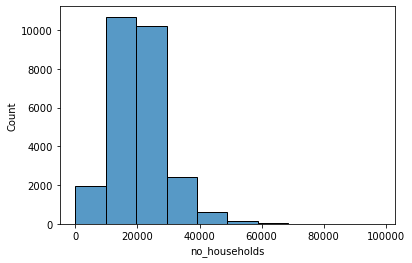

In [55]:
sns.histplot(data = df_lcf_analysis, x = 'no_households', bins = 10)

<AxesSubplot:xlabel='no_households', ylabel='no_households'>

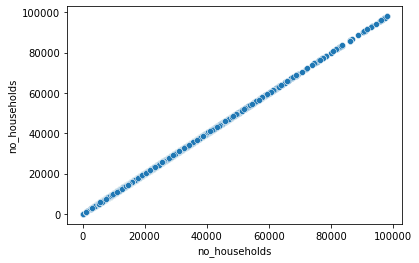

In [56]:
sns.scatterplot(x = 'no_households', y = 'no_households', data = df_lcf_analysis)

The minimum value is not an oultier.

In [57]:
# Find values below the threshold £0 using the iloc function to show all rows and columns
df_lcf_analysis.loc[df_lcf_analysis['total_expenditure'] < 0].iloc[:,:]

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food
14629,14687,2,Index,April to June,129.760000,London,485.927821,1.5,194.640000,194.640000,Social sec. benefits,19.890,0.000,19.890,-72.002138,0.000,-72.002138,Urban,NaN,29.899329,2017,0,2,9.330,1.390,3.020,13.740,6.150000e+00,29899,3879.736978,14528.915950,5819.605466,5819.605466,594.697661,0.000000,594.697661,-2152.815627,0.000000,-2152.815627,278.960743,41.560068,90.295975,1.838809e+02,410.816785,46.907994,6.988436,15.183509
15412,15474,1,Index,July to September,450.182000,Scotland,580.289994,1.0,450.182000,450.182000,Social sec. benefits,45.740,0.000,45.740,-10.825000,0.000,-10.825000,NaN,Urban,9.834826,2018,0,1,5.190,2.050,13.010,20.250,2.549000e+01,9834,4427.461605,5707.051082,4427.461605,4427.461605,449.844938,0.000000,449.844938,-106.461991,0.000000,-106.461991,51.042747,20.161393,127.951085,2.506897e+02,199.155225,11.346742,4.481854,28.443376
15587,15651,1,Index,July to September,143.550000,South West,165.603754,1.0,143.550000,143.550000,Social sec. benefits,17.505,0.000,17.505,-31.375000,0.000,-31.375000,Urban,NaN,25.141128,2018,0,1,4.065,2.425,8.625,15.115,2.390000e+00,25141,3609.008966,4163.465227,3609.008966,3609.008966,440.095451,0.000000,440.095451,-788.802900,0.000000,-788.802900,102.198686,60.967236,216.842231,6.008730e+01,380.008154,23.221937,13.853185,49.271637
16754,16822,3,Index,July to September,121.500000,Scotland,268.089172,1.6,194.400000,194.400000,Social sec. benefits,92.820,0.000,92.820,-25.441459,0.000,-25.441459,NaN,Urban,15.115054,2018,2,1,12.460,8.235,57.990,78.685,1.413500e+01,15115,1836.479020,4052.182221,2938.366432,2938.366432,1402.979281,0.000000,1402.979281,-384.549025,0.000000,-384.549025,188.333569,124.472467,876.521962,2.136513e+02,1189.327997,13.423831,8.872010,62.475760
16921,16990,1,Index,July to September,178.192000,Scotland,249.512147,1.0,178.192000,178.192000,Social sec. benefits,30.295,0.000,30.295,-73.694907,0.000,-73.694907,NaN,Urban,9.466260,2018,0,1,3.500,0.000,18.000,21.500,8.795000e+00,9466,1686.811885,2361.946976,1686.811885,1686.811885,286.780361,0.000000,286.780361,-697.615186,0.000000,-697.615186,33.131912,0.000000,170.392688,8.325576e+01,203.524600,11.553062,0.000000,59.415745
16973,17044,1,Index,July to September,233.261231,London,392.951166,1.0,233.261231,233.261231,Social sec. benefits,7.585,0.000,7.585,-79.417000,0.000,-79.417000,Urban,NaN,33.151957,2018,0,1,6.210,0.000,1.375,7.585,0.000000e+00,33151,7733.066221,13027.100053,7733.066221,7733.066221,251.457592,0.000000,251.457592,-2632.828945,0.000000,-2632.828945,205.873651,0.000000,45.583940,0.000000e+00,251.457592,81.872116,0.000000,18.127884
17996,18073,1,Index,July to September,91.798154,Eastern,139.489067,1.0,104.278154,91.798154,Annuities pensions,31.825,0.000,31.825,-40.281421,0.000,-40.281421,Urban,NaN,18.090321,2018,0,1,6.685,1.415,19.640,27.740,4.085000e+00,18090,1660.658059,2523.401987,1886.425264,1660.658059,575.724462,0.000000,575.724462,-728.703838,0.000000,-728.703838,120.933795,25.597804,355.293902,7.389896e+01,501.825501,21.005499,4.446190,61.712490
18155,18234,1,Index,July to September,150.288154,Eastern,234.142219,1.0,150.288154,150.288154,Social sec. benefits,27.255,0.000,27.255,-84.801446,0.000,-84.801446,Rural,NaN,22.231212,2018,0,1,11.085,4.465,8.85

There are seventeen households with an expenditure less than zero, who are all on social security benefits and across the regions. With the exception of one the period is July to September and the year 2018. These households have been left in the data set.

#### Food Groups
The percentage of ultra_processed_food can not be greater than 100%.

<AxesSubplot:xlabel='%ultra_processed_food', ylabel='Count'>

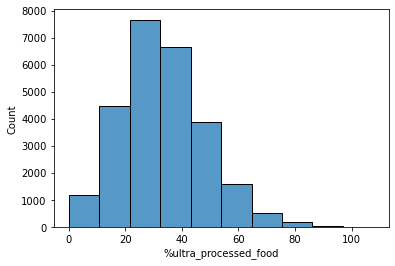

In [58]:
sns.histplot(data = df_lcf_analysis, x = '%ultra_processed_food', bins = 10)

<AxesSubplot:xlabel='%ultra_processed_food', ylabel='%ultra_processed_food'>

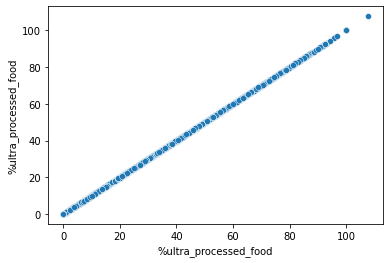

In [59]:
sns.scatterplot(x = '%ultra_processed_food', y = '%ultra_processed_food', data = df_lcf_analysis)

In [60]:
# Contains outliers - values above 100%
# Find values above the threshold 100% using the iloc function to show all rows and only first 15 columns
df_lcf_analysis.loc[df_lcf_analysis['%ultra_processed_food'] > 100].iloc[:,:]

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food
18189,18268,1,Pensioner,January to March,281.938154,South East,341.396808,1.0,281.938154,281.938154,Social sec. benefits,3.445,0.0,3.445,140.369348,0.0,140.369348,Urban,NaN,19.670482,2019,0,1,0.00,0.000,3.445,3.445,-4.440892e-16,19670,5545.859331,6715.439701,5545.859331,5545.859331,67.764810,0.0,67.764810,2761.132701,0.0,2761.132701,0.000000,0.00000,67.764810,-8.735449e-15,67.764810,0.000000,0.000000,100.000000
21284,21383,1,Index,July to September,102.192000,Scotland,225.048390,1.0,102.192000,102.192000,Social sec. benefits,23.750,0.0,23.750,107.404000,0.0,107.404000,NaN,Urban,11.182791,2019,0,1,13.02,5.525,25.580,44.125,-2.037500e+01,11182,1142.791768,2516.669084,1142.791768,1142.791768,265.591284,0.0,265.591284,1201.076472,0.0,1201.076472,145.599938,61.78492,286.055791,-2.278494e+02,493.440649,54.821053,23.263158,107.705263


Remove unique_id 21383.

The food categories when added together can not be greater than 100%

In [61]:
# Check to see if the food categories when added toegether are below 100%
df_lcf_analysis.loc[(df_lcf_analysis['%unprocessed_food'] +  df_lcf_analysis['%processed_food'] + df_lcf_analysis['%ultra_processed_food']) > 100.01].iloc[:,:]

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food
14264,14320,1,Index,January to March,222.172,North West and Merseyside,247.97099,1.0,242.362,222.172,Social sec. benefits,41.05,0.0,41.05,252.592413,0.0,252.592413,Urban,NaN,16.791973,2018,0,1,36.96,11.800,24.34,73.100,-32.050,16791,3730.706318,4163.922279,4069.736262,3730.706318,689.310509,0.0,689.310509,4241.525081,0.0,4241.525081,620.631338,198.145286,408.716633,-538.182748,1227.493257,90.036541,28.745432,59.293544
21284,21383,1,Index,July to September,102.192,Scotland,225.04839,1.0,102.192,102.192,Social sec. benefits,23.75,0.0,23.75,107.404000,0.0,107.404000,NaN,Urban,11.182791,2019,0,1,13.02,5.525,25.58,44.125,-20.375,11182,1142.791768,2516.669084,1142.791768,1142.791768,265.591284,0.0,265.591284,1201.076472,0.0,1201.076472,145.599938,61.784920,286.055791,-227.849365,493.440649,54.821053,23.263158,107.705263


Remove unique_id 14320 and unique_id 21383 identified above.

In [62]:
# Check to se if the weighted unprocessed food cost is below the weighted total food cost
df_lcf_analysis.loc[df_lcf_analysis['W_unprocessed_food'] > df_lcf_analysis['W_total_food_cost']].iloc[:,:]

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food


In [63]:
# Check to se if the weighted processed food cost is below the weighted total food cost
df_lcf_analysis.loc[df_lcf_analysis['W_processed_food'] > df_lcf_analysis['W_total_food_cost']].iloc[:,:]

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food


In [64]:
# Check to se if the weighted ultra-processed food cost is below the weighted total food cost
df_lcf_analysis.loc[df_lcf_analysis['W_ultra_processed_food'] > df_lcf_analysis['W_total_food_cost']].iloc[:,:]

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food
18189,18268,1,Pensioner,January to March,281.938154,South East,341.396808,1.0,281.938154,281.938154,Social sec. benefits,3.445,0.0,3.445,140.369348,0.0,140.369348,Urban,NaN,19.670482,2019,0,1,0.00,0.000,3.445,3.445,-4.440892e-16,19670,5545.859331,6715.439701,5545.859331,5545.859331,67.764810,0.0,67.764810,2761.132701,0.0,2761.132701,0.000000,0.00000,67.764810,-8.735449e-15,67.764810,0.000000,0.000000,100.000000
21284,21383,1,Index,July to September,102.192000,Scotland,225.048390,1.0,102.192000,102.192000,Social sec. benefits,23.750,0.0,23.750,107.404000,0.0,107.404000,NaN,Urban,11.182791,2019,0,1,13.02,5.525,25.580,44.125,-2.037500e+01,11182,1142.791768,2516.669084,1142.791768,1142.791768,265.591284,0.0,265.591284,1201.076472,0.0,1201.076472,145.599938,61.78492,286.055791,-2.278494e+02,493.440649,54.821053,23.263158,107.705263


Remove unique_id 21383 identified above.

In [65]:
# Check to se if all the food categories added together are above 0
df_lcf_analysis.loc[df_lcf_analysis['W_food'] < -0.1].iloc[:,:]

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food


In [66]:
# Check to see if the cost for drinks eating out is above 0
df_lcf_analysis.loc[df_lcf_analysis['W_drinks_eatout'] < -0.1].iloc[:,:]

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food
14264,14320,1,Index,January to March,222.172,North West and Merseyside,247.97099,1.0,242.362,222.172,Social sec. benefits,41.05,0.0,41.05,252.592413,0.0,252.592413,Urban,NaN,16.791973,2018,0,1,36.96,11.800,24.34,73.100,-32.050,16791,3730.706318,4163.922279,4069.736262,3730.706318,689.310509,0.0,689.310509,4241.525081,0.0,4241.525081,620.631338,198.145286,408.716633,-538.182748,1227.493257,90.036541,28.745432,59.293544
21284,21383,1,Index,July to September,102.192,Scotland,225.04839,1.0,102.192,102.192,Social sec. benefits,23.75,0.0,23.75,107.404000,0.0,107.404000,NaN,Urban,11.182791,2019,0,1,13.02,5.525,25.58,44.125,-20.375,11182,1142.791768,2516.669084,1142.791768,1142.791768,265.591284,0.0,265.591284,1201.076472,0.0,1201.076472,145.599938,61.784920,286.055791,-227.849365,493.440649,54.821053,23.263158,107.705263


Remove unique_id 21383 identified above.

## 13. Removing Outliers, Dirty Data and Calculated Columns no Longer Required

Removing the outliers identified above - unique_id's:
* 21383
* 14320

In [67]:
# Search for unique_id of data identified above and view the first five rows
df_remove =  df_lcf_analysis[df_lcf_analysis['unique_id'].isin([21383, 14320])]
df_remove.head()

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,food,drinks_eatout,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,W_drinks_eatout,W_food,%unprocessed_food,%processed_food,%ultra_processed_food
14264,14320,1,Index,January to March,222.172,North West and Merseyside,247.97099,1.0,242.362,222.172,Social sec. benefits,41.05,0.0,41.05,252.592413,0.0,252.592413,Urban,NaN,16.791973,2018,0,1,36.96,11.800,24.34,73.100,-32.050,16791,3730.706318,4163.922279,4069.736262,3730.706318,689.310509,0.0,689.310509,4241.525081,0.0,4241.525081,620.631338,198.145286,408.716633,-538.182748,1227.493257,90.036541,28.745432,59.293544
21284,21383,1,Index,July to September,102.192,Scotland,225.04839,1.0,102.192,102.192,Social sec. benefits,23.75,0.0,23.75,107.404000,0.0,107.404000,NaN,Urban,11.182791,2019,0,1,13.02,5.525,25.58,44.125,-20.375,11182,1142.791768,2516.669084,1142.791768,1142.791768,265.591284,0.0,265.591284,1201.076472,0.0,1201.076472,145.599938,61.784920,286.055791,-227.849365,493.440649,54.821053,23.263158,107.705263


In [68]:
# Remove the data identified above and view the shape of the dataframe
remove_list = [21383, 14320]
df_lcf_analysis = df_lcf_analysis[~df_lcf_analysis.unique_id.isin(remove_list)]
df_lcf_analysis.shape

(26146, 47)

#### Removing calculated columns

In [69]:
# Remove the columns 'W_drinks_eatout' and 'W_food' then display all columns
df_lcf_analysis.drop(columns = ['food', 'drinks_eatout', 'W_drinks_eatout', 'W_food'], inplace = True)
pd.set_option('display.max_columns', None)
df_lcf_analysis.head()

,unique_id,no_people,household_type,quarter,OECD_disposable_income,region,total_income,OECD_scale,gross_income,weekly_disposable_income,income_source,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,eng_rural_urb,scot_rural_urb,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,%unprocessed_food,%processed_food,%ultra_processed_food
0,1,1,Index,January to March,173.270000,Eastern,179.684359,1.0,173.27,173.27,Self-employment inc.,38.675,0.000,38.675,98.278236,0.000,98.278236,Rural,NaN,25.550684,2016,0,1,14.600,0.275,21.715,25550,4427.167040,4591.058300,4427.167040,4427.167040,988.172709,0.000000,988.172709,2511.076176,0.000000,2511.076176,373.039988,7.026438,554.833106,37.750485,0.711054,56.147382
1,2,5,Index,July to September,333.667857,North West and Merseyside,1117.340000,2.8,1117.34,934.27,Wages salaries,60.670,0.800,61.470,437.867812,3.800,441.667812,Urban,NaN,30.114910,2015,1,4,10.735,1.300,26.210,30114,10048.377621,33648.593987,33648.593987,28135.457340,1827.071614,24.091928,1851.163542,13186.349938,114.436660,13300.786598,323.283563,39.149384,789.311802,17.463803,2.114853,42.638686
2,3,2,Index,January to March,678.860000,North West and Merseyside,1269.120000,1.5,732.74,1018.29,Wages salaries,127.435,0.000,127.435,802.527055,0.000,802.527055,Urban,NaN,21.164147,2016,0,2,35.370,6.290,35.475,21164,14367.493149,26859.842833,15507.817415,21551.239724,2697.053132,0.000000,2697.053132,16984.800931,0.000000,16984.800931,748.575896,133.122488,750.798131,27.755326,4.935850,27.837721
3,4,3,Index,July to September,180.000000,South East,391.475289,1.6,288.00,288.00,Social sec. benefits,48.500,1.000,49.500,580.569766,1.000,581.569766,Urban,NaN,15.847543,2015,2,1,14.155,3.880,11.975,15847,2852.557690,6203.921362,4564.092304,4564.092304,768.605822,15.847543,784.453365,9200.604165,15.847543,9216.451707,224.321967,61.488466,189.774324,28.595960,7.838384,24.191919
4,5,3,Index,April to June,375.455000,North West and Merseyside,922.302564,2.0,911.70,750.91,Wages salaries,135.770,23.475,164.470,594.895641,38.465,638.585641,Urban,NaN,15.858930,2015,1,2,12.380,4.110,54.445,15858,5954.314567,14626.731813,14458.586491,11908.629135,2153.166928,372.288382,2608.318219,9434.408332,610.013743,10127.284984,196.333554,65.180202,863.439444,7.527209,2.498936,33.103302


In [70]:
# Checking the shape of the dataframe
df_lcf_analysis.shape

(26146, 43)

In [71]:
# Checking the Descriptive Statistics
df_lcf_analysis.describe()

,unique_id,no_people,OECD_disposable_income,total_income,OECD_scale,gross_income,weekly_disposable_income,adult_food_cost,child_food_cost,total_food_cost,adult_total_expenditure,child_total_expenditure,total_expenditure,quarterly_weight,year,no_children,no_adult,unprocessed_food,processed_food,ultra_processed_food,no_households,W_OECD_disposable_income,W_total_income,W_gross_income,W_disposable_income,W_adult_food_cost,W_child_food_cost,W_total_food_cost,W_adult_total_expenditure,W_child_total_expenditure,W_total_expenditure,W_unprocessed_food,W_processed_food,W_ultra_processed_food,%unprocessed_food,%processed_food,%ultra_processed_food
count,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000
mean,13131.101430,2.351067,429.577695,805.415540,1.591169,754.355064,669.376834,90.484444,0.819400,91.535586,549.107048,2.302359,551.112982,20.821861,2017.303526,0.523942,1.827125,21.405590,6.305646,28.021574,20821.356039,9057.724312,17166.512151,16061.299498,14213.109743,1892.614706,16.264278,1913.489410,11531.948927,45.868346,11572.480071,445.369094,132.415504,577.726741,24.887772,7.252082,33.283819
std,7585.978281,1.243450,284.194944,543.594766,0.511529,545.321931,425.755717,59.938497,3.420648,60.854728,419.036108,10.335091,420.127416,8.740412,1.468809,0.929768,0.733605,16.182031,6.127758,19.088380,8740.416750,7755.358972,15388.893938,15143.707867,12199.355518,1678.061349,73.277583,1699.331054,10773.111185,222.405354,10801.854202,435.979767,163.606373,504.412742,12.865576,5.895812,14.722402
min,1.000000,1.000000,-1148.750000,0.000000,1.000000,0.000000,-1268.400800,0.300000,0.000000,0.300000,-157.820000,0.000000,-157.820000,0.004000,2015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,-20493.301791,0.000000,0.000000,-20493.301791,0.416920,0.000000,0.432860,-2632.828945,0.000000,-2632.828945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6562.250000,1.000000,248.034184,395.131456,1.000000,346.182500,345.638500,47.190000,0.000000,47.477500,279.715941,0.000000,280.520902,15.586667,2016.000000,0.000000,1.000000,9.750000,2.150000,14.190000,15586.000000,4287.199818,6986.035744,6076.945105,6061.726386,822.648908,0.000000,829.496592,4866.694199,0.000000,4880.679987,172.309586,37.604134,253.260366,15.692977,3.275104,22.940254
50%,13120.500000,2.000000,368.767650,658.971250,1.500000,614.605000,576.670000,78.280000,0.000000,79.155000,454.421890,0.000000,456.624799,19.851104,2017.000000,0.000000,2.000000,17.965000,4.700000,24.195000,19850.500000,7063.281116,12498.428255,11436.156769,10765.213592,1450.926417,0.000000,1464.224284,8558.530070,0.000000,8604.910450,334.085534,87.093152,447.743521,23.296436,6.013692,32.030204
75%,19699.750000,3.000000,532.828810,1068.447500,2.000000,1023.962923,895.785000,120.627500,0.000000,122.193750,697.688063,0.000000,701.361608,24.778990,2019.000000,1.000000,2.000000,29.085000,8.520000,37.525000,24778.250000,11391.703345,22108.802365,20953.520821,18431.405175,2422.236526,0.000000,2450.939133,14588.311728,0.000000,14654.854974,577.982981,170.973849,749.316521,32.352564,9.770001,42.413428
max,26271.000000,9.000000,2496.180000,2510.291538,4.500000,2496.180000,1898.138800,977.445000,86.020000,977.445000,8109.473568,467.735000,8109.473568,97.999999,2020.000000,7.000000,8.000000,175.790000,92.805000,201.220000,97999.000000,133649.028900,201567.660000,193298.760000,163239.936800,30982.090254,1891.936549,31102.982150,179804.147713,10790.423919,179804.147713,8650.517599,7572.262647,10198.476554,100.000000,100.000000,100.000000


---

## 14. Exporting the Integrated Data Set

In [72]:
# Export the dataframe into the Prepared_Data folder as lcf_analysis.csv and lcf_analysis.pkl
df_lcf_analysis.to_csv(os.path.join(path, '02_Data','02_2_Prepared_Data', 'lcf_analysis.csv'))
df_lcf_analysis.to_pickle(os.path.join(path, '02_Data','02_2_Prepared_Data', 'lcf_analysis.pkl'))